# DataScience 450 - Assignment 1 - Ryan Timbrook

Description:
Design a simple, low­cost sensor that can distinguish between red wine and white wine.

The sensor must correctly distinguish between red and white wine for at least 95% of the samples in a set of 6497 test samples of red and white wine.
Your technology is capable of sensing the following wine attributes:
Fixed acidity  ­  Free sulphur dioxide Volatile acidity  ­  Total sulphur dioxide Citric acid  ­  Sulphates Residual sugar  ­  pH Chlorides  ­ Alcohol Density

Tasks
1.Read WineQuality.pdf. 
2.Use the RedWhiteWine.csv/arff file that is provided.  Note: If needed, remove the quality attribute, which you will not need for this assignment. 3.Build an experiment using Decision Trees.

Questions:
1-What is the percentage of correct classification results, using all attributes?

Answer: Using the entire dataset's 11 attributes yields an accuracy score of %97.8

2-What is the percentage of correct classification results, using a subset of attributes?

Answer 2.1: Limiting the dataset to 6 attributes yields an accuracy score of 96.1%
;Attribute List: fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,density

Answer 2.2: Limiting the dataset to 5 attributes yields an accuracy score of 96.2%
;Attribute List: fixed.acidity,citric.acid,residual.sugar,chlorides,density

Answer 2.3: Limiting the dataset to 4 attributes yields an accuracy score of 95.5%
;Attribute List: fixed.acidity,citric.acid,residual.sugar,chlorides

Answer 2.4: Limiting the dataset to  3 attributes yields an accuracy score of 95.7%
;Attribute List: fixed.acidity,residual.sugar,chlorides

***BELOW ACCEPTANCE CRITERIA of 95% Accuracy - > Answer 2.5: Limiting the dataset to 2 attributes yields an accuracy score of 92%
;Attribute List: fixed.acidity,residual.sugar

3-What is the AUC of your model?, What is the best AUC achieved?
Answer: The AUC of the heighest accuracy score test was 98%

4-Which are the minimum number of attributes, why?

Answer: The minimum number of attributes that yielded a greater than 95% accuracy score was 3.
They were (fixed.acidity,residual.sugar,chlorides)



In [127]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
df = read.data('RedWhiteWine.csv')

# Remove quality attribute, not needed for this assignment
df = subset(df,select=-quality)
# Add a more descriptive label for Wine Type Red=1, White=2
df$r.or.w = ifelse(df$Class == 1,'R','W')
df$r.or.w = as.factor(df$r.or.w)

In [128]:
#Explore the Data
str(df)
summary(subset(df,select=-Class))
lapply(subset(df,select=-Class),sd)
head(df,n=10)
tail(df)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ Class               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ r.or.w              : Factor w/ 2 levels "R","W": 1 1 1 1 1 1 1 1 1 1 ...


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector."

$fixed.acidity
[1] 1.296434

$volatile.acidity
[1] 0.1646365

$citric.acid
[1] 0.1453179

$residual.sugar
[1] 4.757804

$chlorides
[1] 0.0350336

$free.sulfur.dioxide
[1] 17.7494

$total.sulfur.dioxide
[1] 56.52185

$density
[1] 0.002998673

$pH
[1] 0.1607872

$sulphates
[1] 0.1488059

$alcohol
[1] 1.192712

$r.or.w
[1] 0.4307787

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Class,r.or.w
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,R
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1,R
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1,R
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1,R
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,R
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1,R
7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1,R
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,1,R
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,1,R
7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,1,R


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Class,r.or.w
6492,6.5,0.23,0.38,1.3,0.032,29,112,0.99298,3.29,0.54,9.7,0,W
6493,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,0,W
6494,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,0,W
6495,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,0,W
6496,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,0,W
6497,6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,0,W


Using r.or.w as id variables


r.or.w,variable,value
R,fixed.acidity,7.4
R,fixed.acidity,7.8
R,fixed.acidity,7.8
R,fixed.acidity,11.2
R,fixed.acidity,7.4


Using r.or.w as id variables


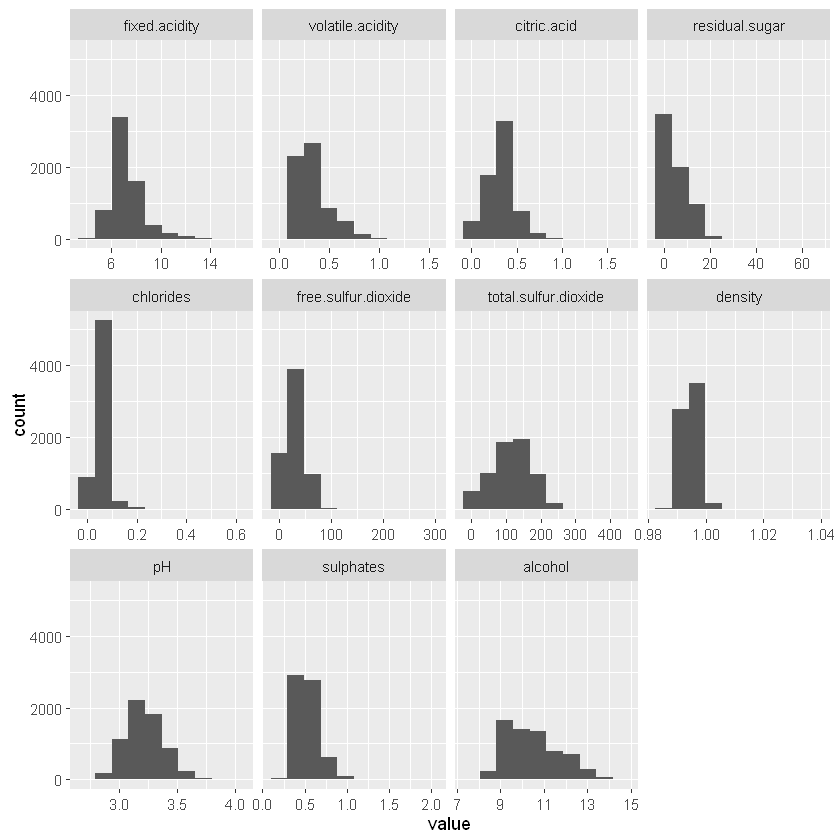

In [129]:
#Visualize the Data
if(!require(reshape2)){install.packages("reshape2")}
head(melt(df),n=5)
if(!require(ggplot2)){install.packages("ggplot2")}
ggplot(melt(subset(df,select=-Class)),mapping = aes(x=value)) +
  geom_histogram(bins=10) +
  facet_wrap(~variable,scales = 'free_x')

In [130]:
#Function to Partition Data Set into training, testing, and validation sets
ds.partition = function(ds){
  ds.randoms = runif(nrow(ds))
  ds.split.mark = quantile(ds.randoms,.5)
  ds.train.flg = ds.randoms <= ds.split.mark
  ds.training = ds[ds.train.flg,]
  
  ds.randoms.t = runif(nrow(ds.training))
  ds.split.mark.t = quantile(ds.randoms.t,.5)
  ds.test.flg.t = ds.randoms.t <= ds.split.mark.t
  ds.testing = ds.training[ds.test.flg.t,]
  ds.validate = ds.training[!ds.test.flg.t,]
  
  ds.split = list(data.training=ds.training,data.testing=ds.testing,data.validating=ds.validate)
  return(ds.split)
}

#set seed
set.seed(4)
#Partition Data Sets
ds.partitions = ds.partition(df)

In [131]:
#Classification Tree (Recursive Partitioning and Regression Trees)
build.tree = function(tree.formula,dataset){
  if(!require(rpart)){install.packages("rpart")}
  
  tree = rpart(tree.formula,data=dataset,method='class')
  return(tree)
}
#Plot tree function - fancy...
plot.tree.fancy = function(tree){
    if(!require(rpart.plot)){install.packages("rpart.plot")}
    if(!require(rattle)){install.packages("rattle")}
    if(!require(RColorBrewer)){install.packages("RColorBrewer")}

    fancyRpartPlot(tree)
}

#Prediciton Function
get.wine.prediction = function(tree,dataset){
  #Predict
  predictions = predict(tree,dataset)
  actuals = ifelse(dataset$r.or.w=='R',"R","W")
  #Use a threshold to turn prediction probability into a prediction
  #Convert the predicted probabilites to predictions using a threshold
  threshold = .7
  predicted = ifelse(predictions[,1] > threshold, "R", "W")
  
  #confusion matrices
  cm = table(predicted,actuals,dnn = c("Predicted","Actual"))
  print(cm)
  
  #Calculate accuracy is defined as the fraction of predictions that are correct
  red.count.actual = nrow(dataset[dataset$r.or.w == 'R',])
  white.count.actual = nrow(dataset[dataset$r.or.w == 'W',])
  red.count.predicted = cm[1]
  white.count.predicted = cm[2,2]
  total.tests = nrow(dataset)
  total.correct.predictions = red.count.predicted + white.count.predicted
  
  accuracy = total.correct.predictions/total.tests
  print(paste0("Accuracy: ","%",round(accuracy*100,1)))
  return(predictions)
}

#Get AUC
wine.prediction.auc = function(response,predictions){
  if(!require(pROC)){install.packages("pROC")}
  roc.obj = roc(response,predictions)
  return(auc(roc.obj))
}

#Plot AUC
plot.wine.auc = function(response,predictions){
  if(!require(pROC)){install.packages("pROC")}
  roc.obj = roc(response,predictions)
  scores.rounded = round(predictions,digits=1)
  roc.rounded = roc(response,scores.rounded)
  plot(roc.obj,print.auc=TRUE)
  lines(roc.rounded,col='red',type='b')
  text(0.4,0.43,labels=sprintf("AUC:%0.3f",auc(roc.rounded)),col='red')
}
 

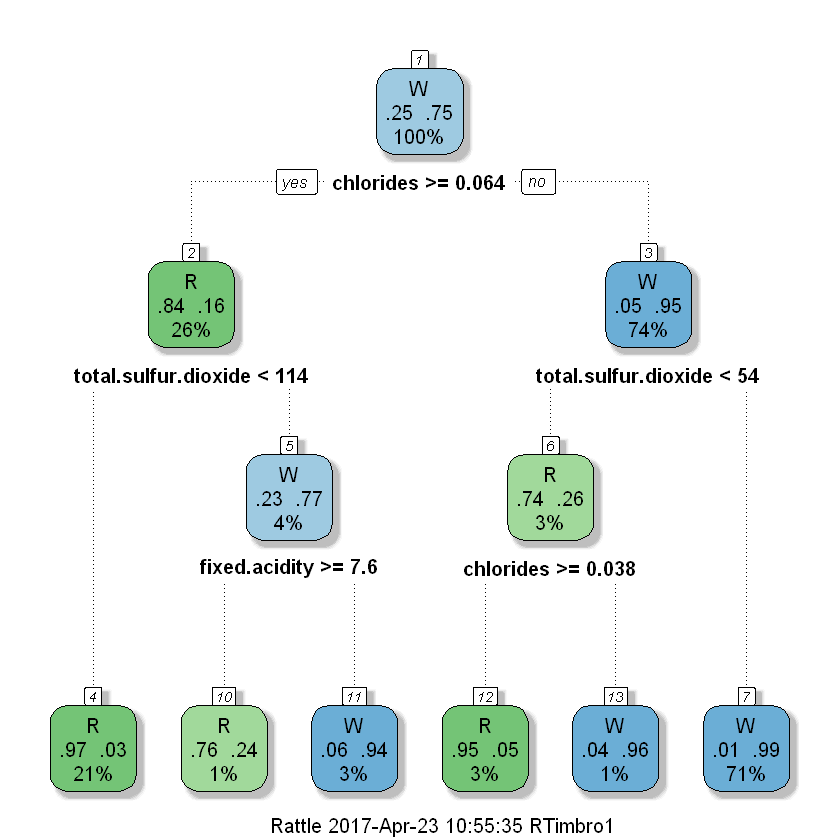

In [132]:
#Build a Decision tree based on all Attributes and plot the results
tree.all = build.tree(r.or.w~.-Class,ds.partitions$data.training)
plot.tree.fancy(tree.all)

         Actual
Predicted    R    W
        R  393   18
        W   18 1196
[1] "Accuracy: %97.8"


[1] "AUC: 0.978791632094341"

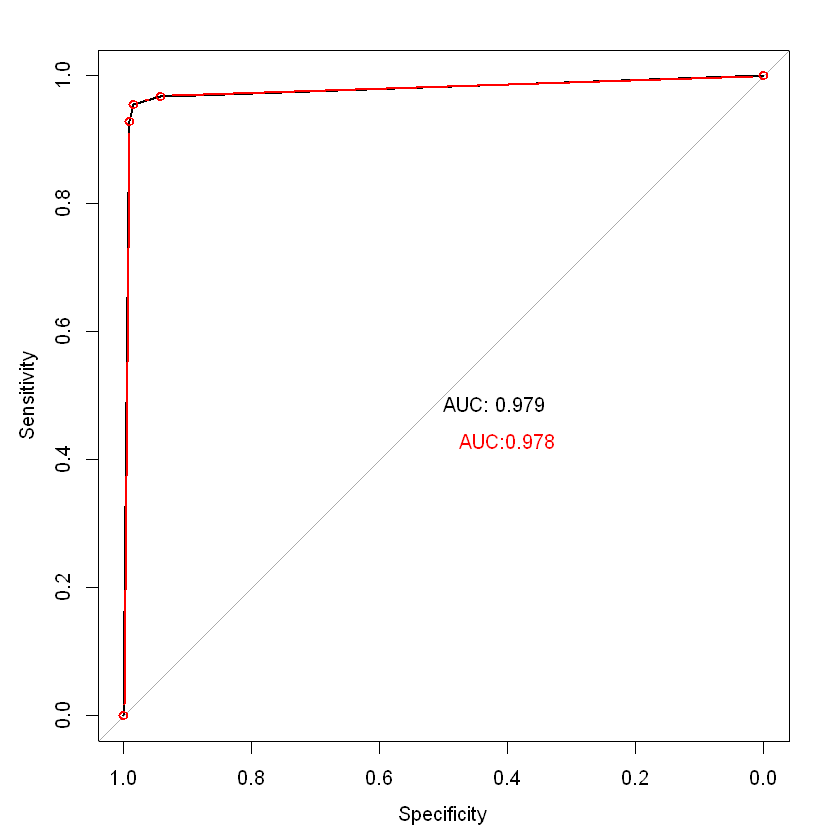

In [133]:
#Calculate Accuracy of training model predictions to test data set and the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.all,ds.partitions$data.testing)
wine.auc = wine.prediction.auc(ds.partitions$data.testing$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.testing$Class,wine.predictions[,1])

         Actual
Predicted    R    W
        R  386   17
        W   18 1203
[1] "Accuracy: %97.8"


[1] "AUC: 0.973182113293297"

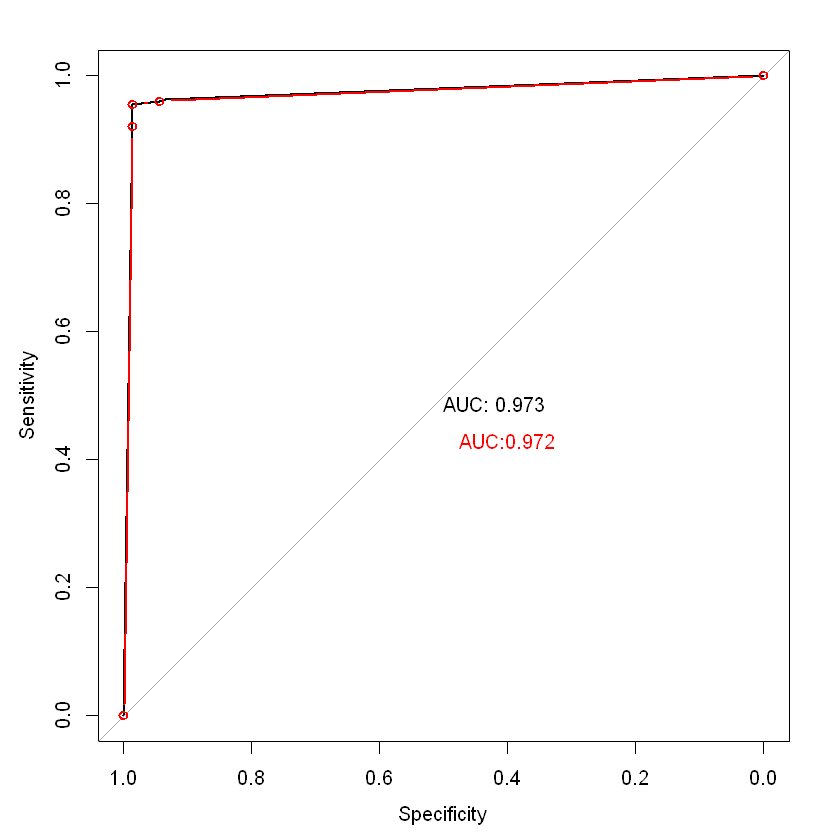

In [134]:
#Validation DataSet -Calculate Accuracy of training model predictions to validation data set and the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.all,ds.partitions$data.validating)
wine.auc = wine.prediction.auc(ds.partitions$data.validating$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.validating$Class,wine.predictions[,1])

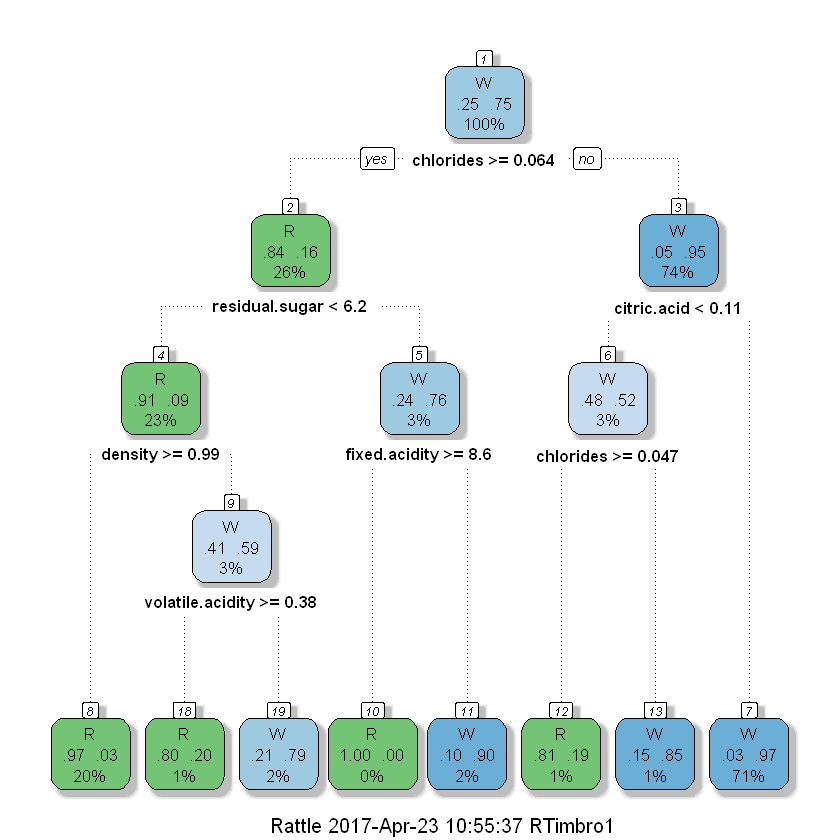

In [135]:
#Build a Decision tree with the six sensory attributes of the dataset's attributes and plot the results
tree.sub.1 = build.tree(r.or.w~fixed.acidity+volatile.acidity+citric.acid+residual.sugar+chlorides+density,ds.partitions$data.training)
fancyRpartPlot(tree.sub.1)

         Actual
Predicted    R    W
        R  362   14
        W   49 1200
[1] "Accuracy: %96.1"


[1] "AUC: 0.949587537127671"

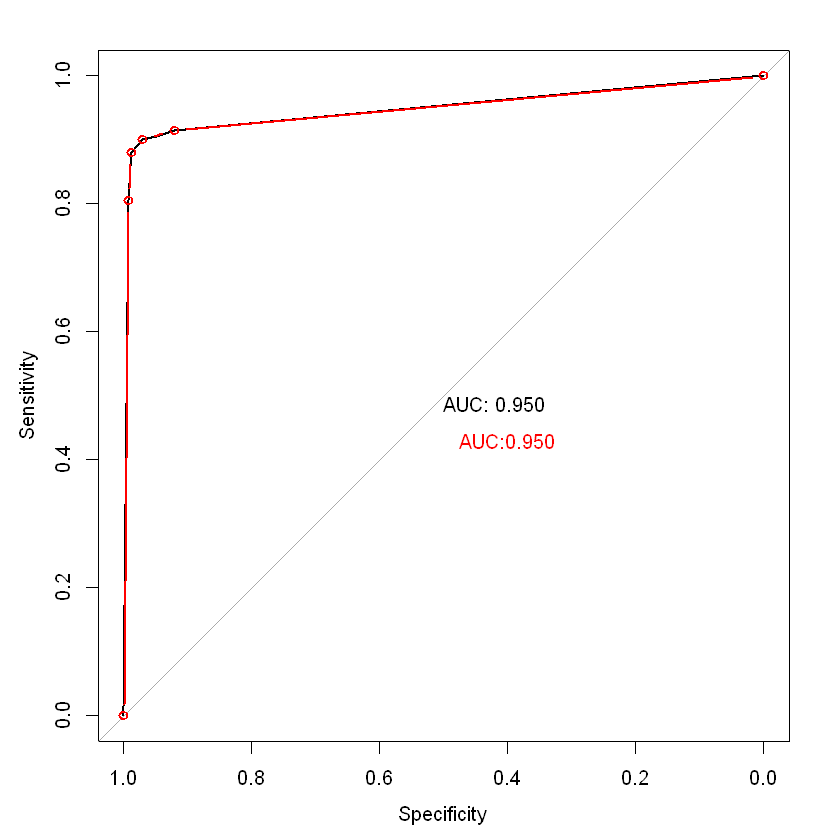

In [136]:
#Calculate Accuracy of training model predictions to test data set and the AUC, the area under the ROC Curvewine.predictions = get.wine.prediction(tree.sub.1,ds.partitions$data.testing)
wine.predictions = get.wine.prediction(tree.sub.1,ds.partitions$data.testing)
wine.auc = wine.prediction.auc(ds.partitions$data.testing$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.testing$Class,wine.predictions[,1])

         Actual
Predicted    R    W
        R  360   18
        W   44 1202
[1] "Accuracy: %96.2"


[1] "AUC: 0.953816344749229"

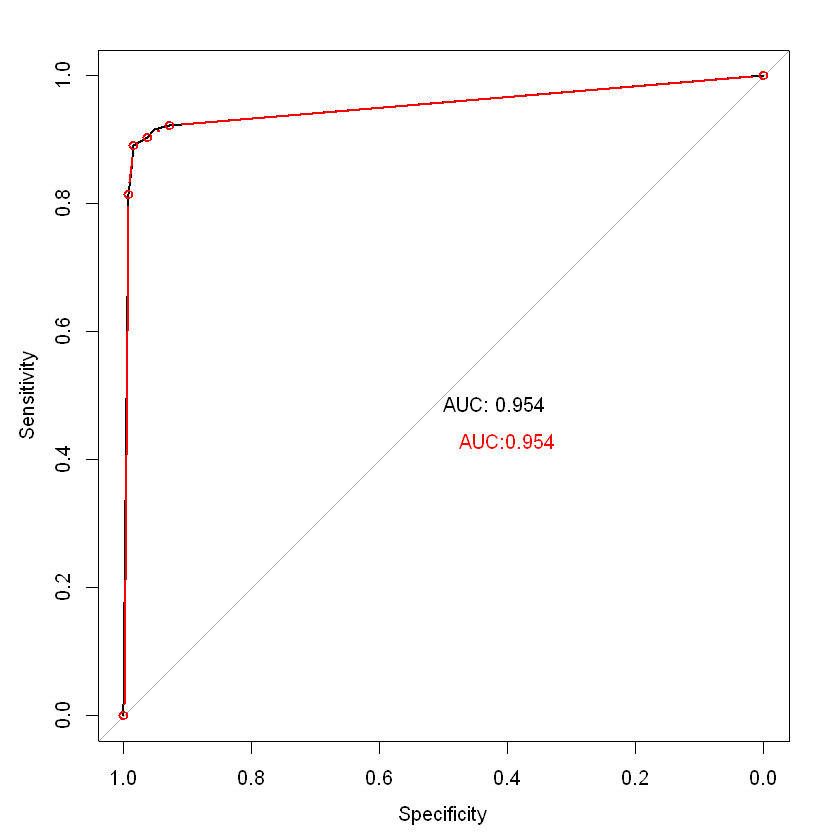

In [137]:
#Validation DataSet -Calculate Accuracy of training model predictions to validation data set and the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.1,ds.partitions$data.validating)
wine.auc = wine.prediction.auc(ds.partitions$data.validating$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.validating$Class,wine.predictions[,1])

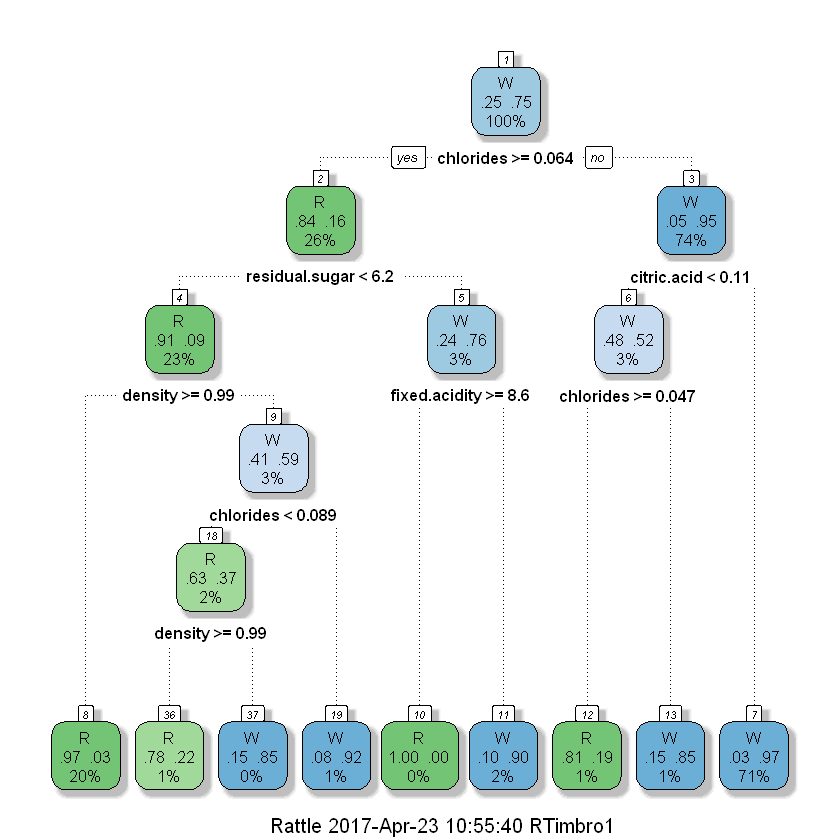

In [138]:
#Build a Decision tree with a subset of the dataset's attributes and plot the results
#Attributes removed: volitial.acidity
tree.sub.2 = build.tree(r.or.w~fixed.acidity+citric.acid+residual.sugar+chlorides+density,ds.partitions$data.training)
fancyRpartPlot(tree.sub.2)

         Actual
Predicted    R    W
        R  366   17
        W   45 1197
[1] "Accuracy: %96.2"


[1] "AUC: 0.949614593730083"

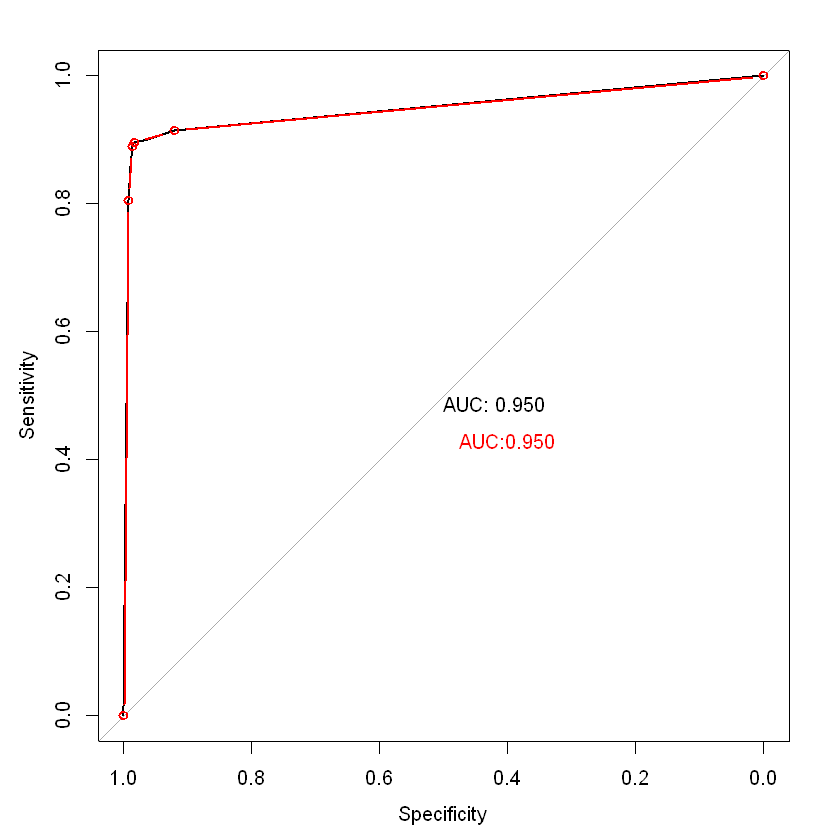

In [139]:
#Calculate the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.2,ds.partitions$data.testing)
wine.auc = wine.prediction.auc(ds.partitions$data.testing$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.testing$Class,wine.predictions[,1])

         Actual
Predicted    R    W
        R  364   18
        W   40 1202
[1] "Accuracy: %96.4"


[1] "AUC: 0.954134880701185"

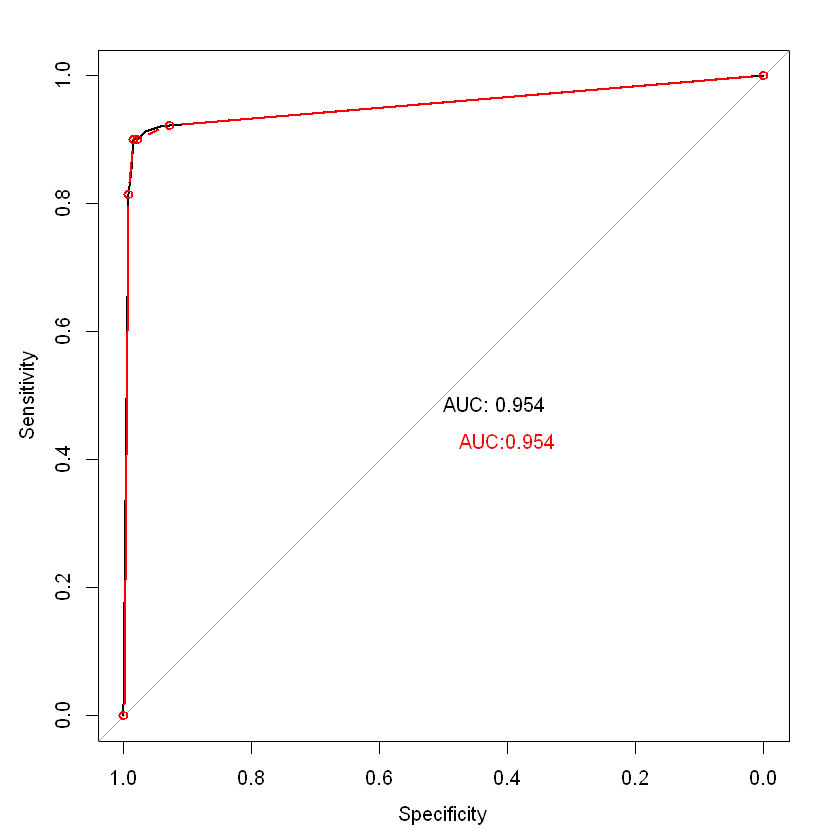

In [140]:
#Validation DataSet -Calculate Accuracy of training model predictions to validation data set and the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.2,ds.partitions$data.validating)
wine.auc = wine.prediction.auc(ds.partitions$data.validating$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.validating$Class,wine.predictions[,1])

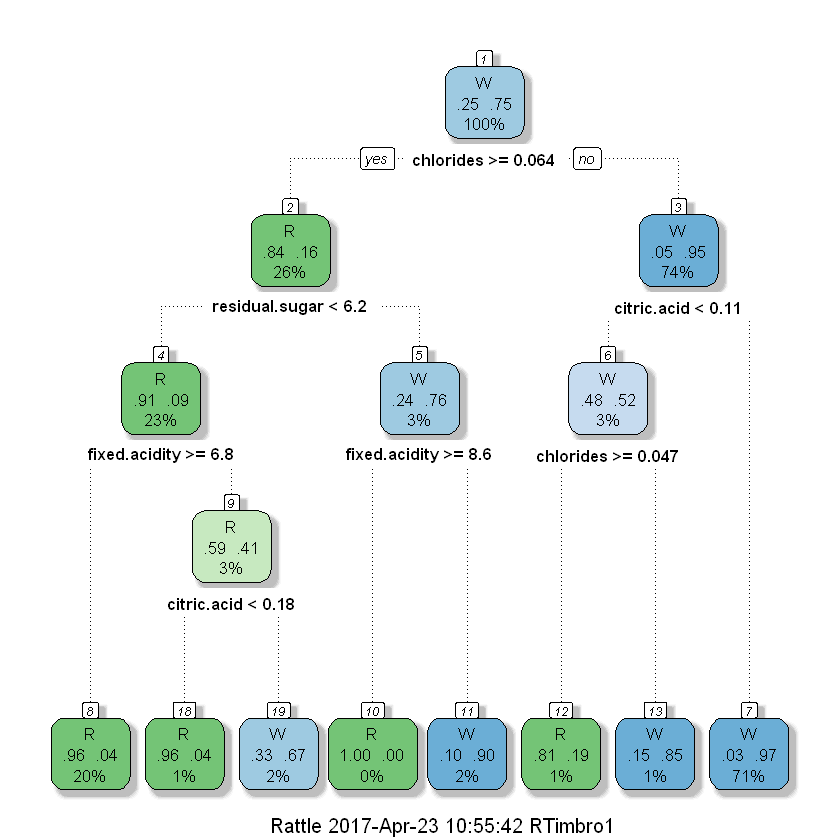

In [141]:
#Build a Decision tree with a subset of the dataset's attributes and plot the results
#Attributes removed: volatile.acidity, density
tree.sub.3 = build.tree(r.or.w~fixed.acidity+citric.acid+residual.sugar+chlorides,ds.partitions$data.training)
fancyRpartPlot(tree.sub.3)

         Actual
Predicted    R    W
        R  360   22
        W   51 1192
[1] "Accuracy: %95.5"


[1] "AUC: 0.945825667295983"

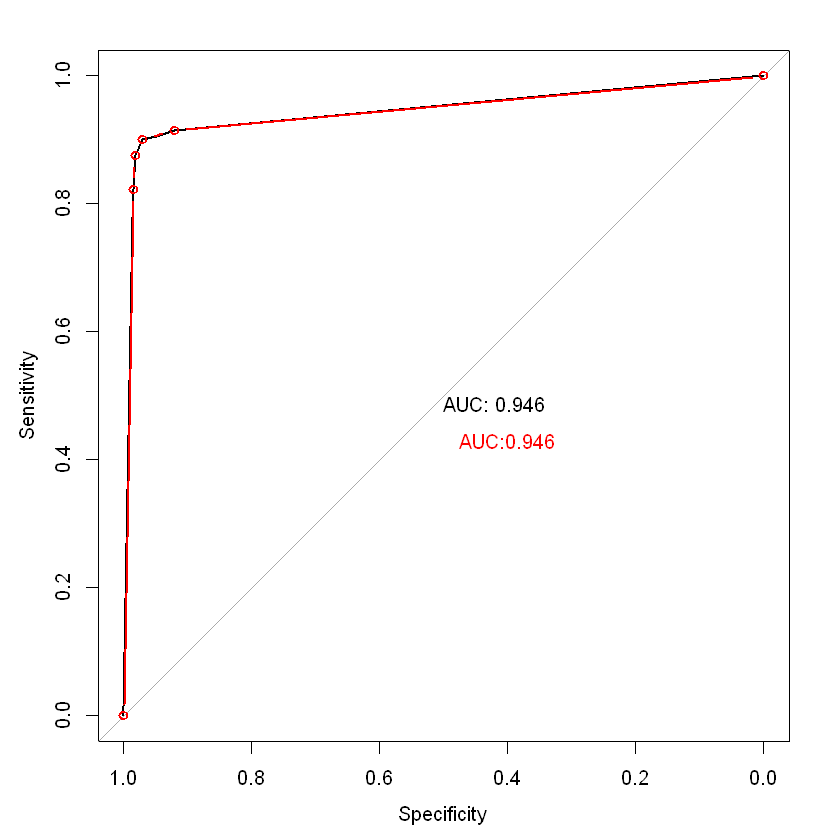

In [142]:
#Calculate the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.3,ds.partitions$data.testing)
wine.auc = wine.prediction.auc(ds.partitions$data.testing$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.testing$Class,wine.predictions[,1])

         Actual
Predicted    R    W
        R  354   16
        W   50 1204
[1] "Accuracy: %95.9"


[1] "AUC: 0.953186373965265"

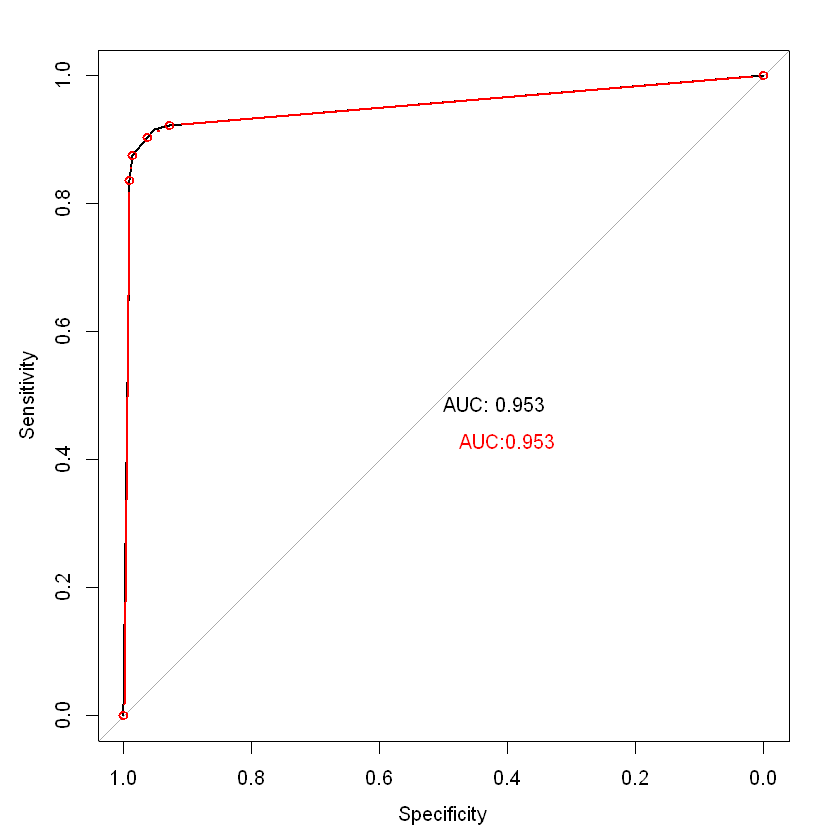

In [143]:
#Validation DataSet -Calculate Accuracy of training model predictions to validation data set and the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.3,ds.partitions$data.validating)
wine.auc = wine.prediction.auc(ds.partitions$data.validating$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.validating$Class,wine.predictions[,1])

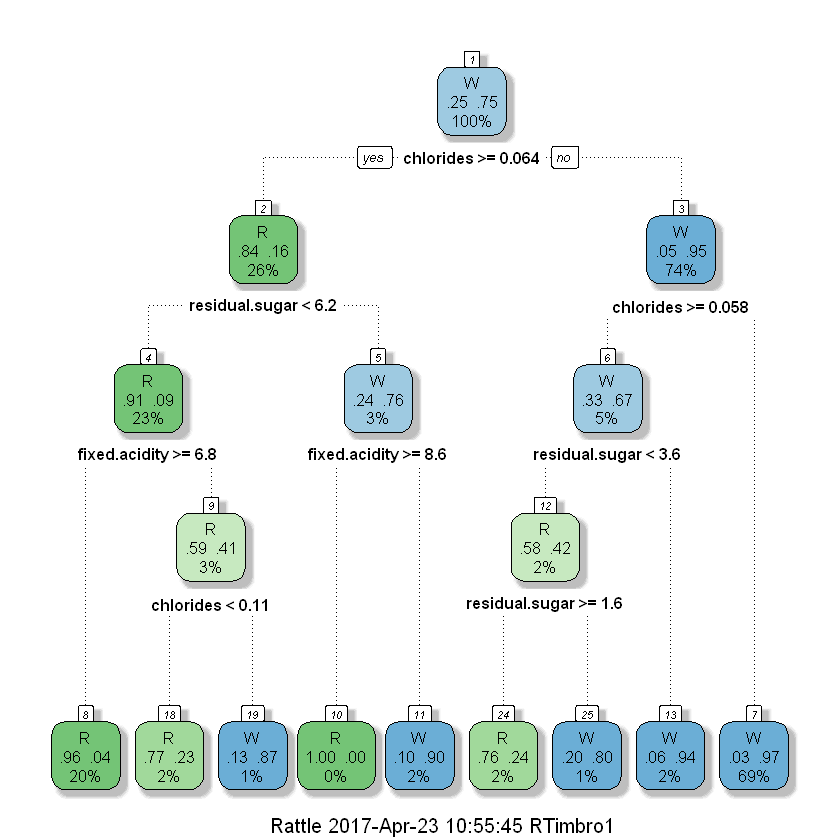

In [144]:
#Build a Decision tree with a subset of the dataset's attributes and plot the results
#Attributes removed: volatile.acidity, density, citric.acid
tree.sub.4 = build.tree(r.or.w~fixed.acidity+residual.sugar+chlorides,ds.partitions$data.training)
fancyRpartPlot(tree.sub.4)

         Actual
Predicted    R    W
        R  370   29
        W   41 1185
[1] "Accuracy: %95.7"


[1] "AUC: 0.949005319127615"

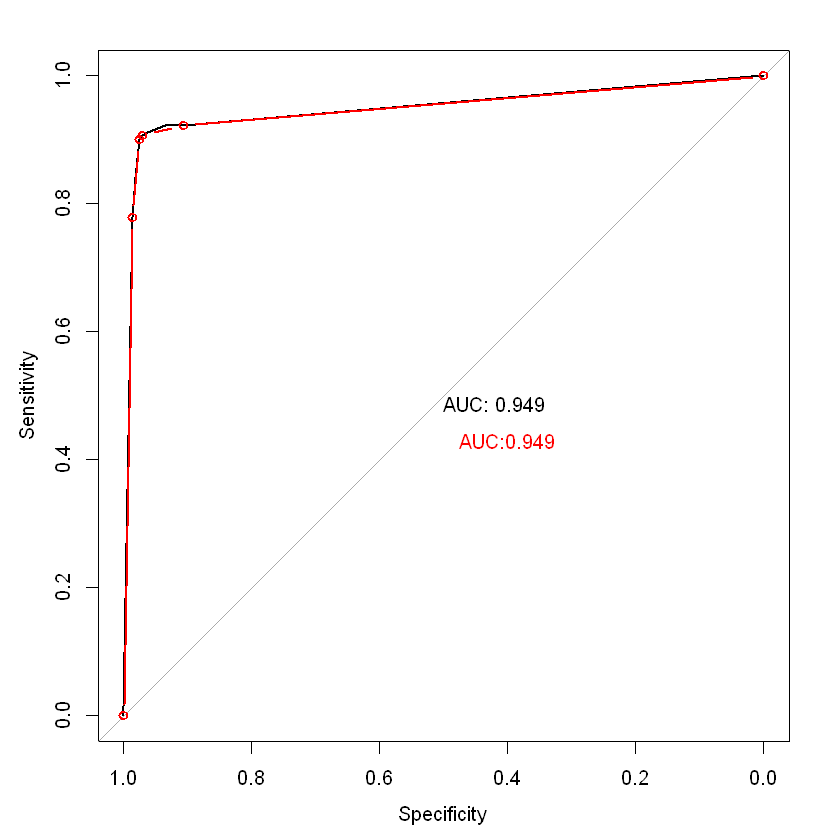

In [145]:
#Test DataSet - Calculate the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.4,ds.partitions$data.testing)
wine.auc = wine.prediction.auc(ds.partitions$data.testing$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.testing$Class,wine.predictions[,1])

         Actual
Predicted    R    W
        R  364   29
        W   40 1191
[1] "Accuracy: %95.8"


[1] "AUC: 0.954784125953579"

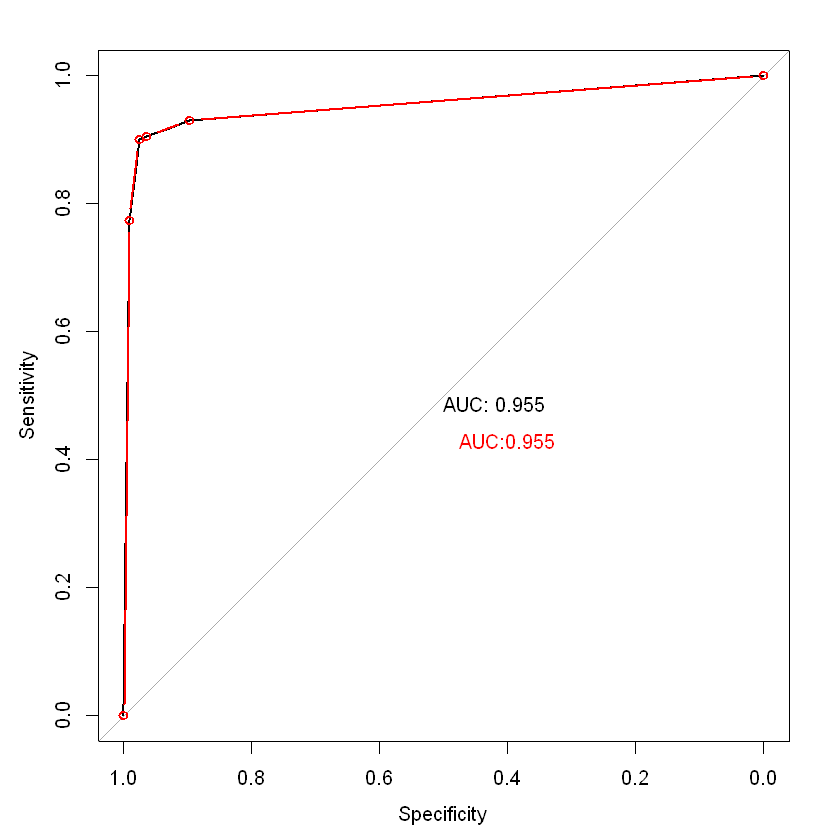

In [146]:
#Validation DataSet -Calculate Accuracy of training model predictions to validation data set and the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.4,ds.partitions$data.validating)
wine.auc = wine.prediction.auc(ds.partitions$data.validating$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.validating$Class,wine.predictions[,1])

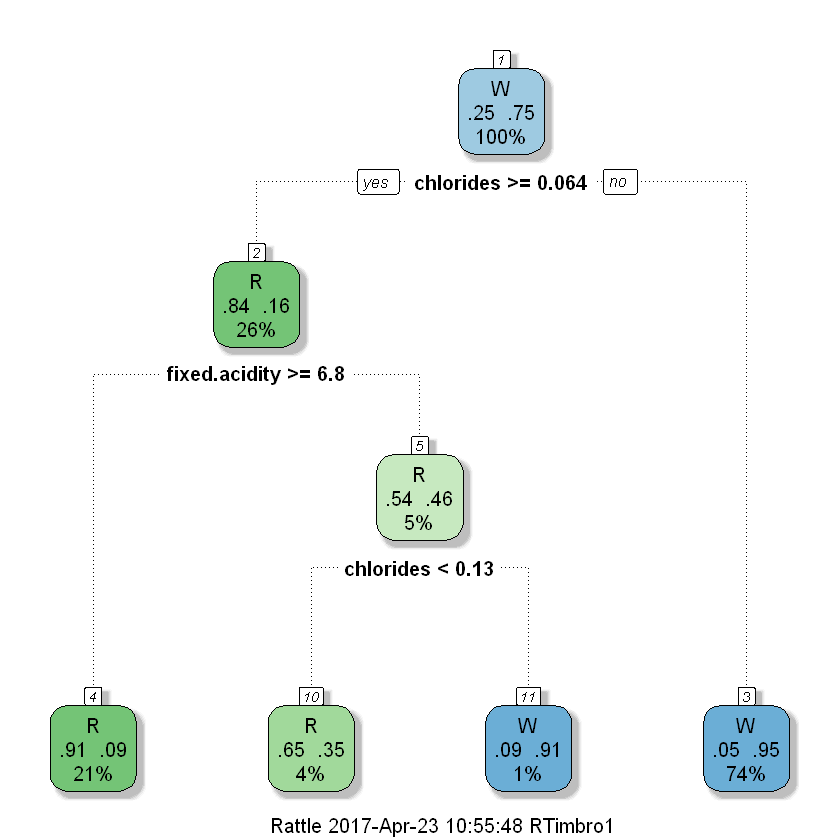

In [147]:
#Build a Decision tree with a subset of the dataset's attributes and plot the results
#Attributes removed: volatile.acidity, density, citric.acid, residual.sugar
tree.sub.5 = build.tree(r.or.w~fixed.acidity+chlorides,ds.partitions$data.training)
fancyRpartPlot(tree.sub.5)

         Actual
Predicted    R    W
        R  317   36
        W   94 1178
[1] "Accuracy: %92"


[1] "AUC: 0.909734163870818"

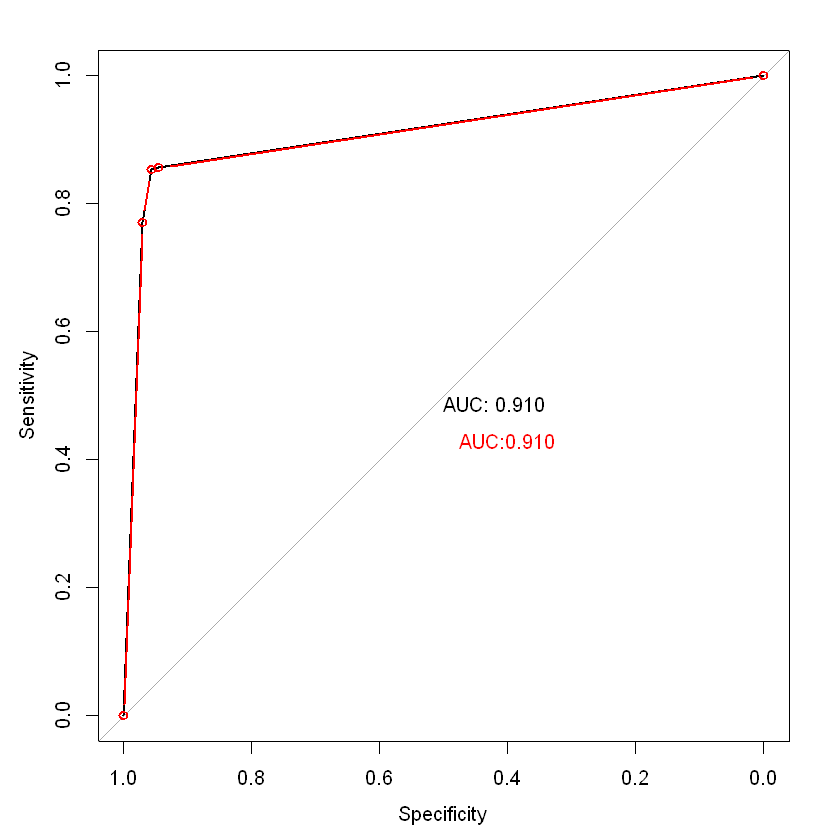

In [148]:
#Calculate the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.5,ds.partitions$data.testing)
wine.auc = wine.prediction.auc(ds.partitions$data.testing$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.testing$Class,wine.predictions[,1])

         Actual
Predicted    R    W
        R  303   24
        W  101 1196
[1] "Accuracy: %92.3"


[1] "AUC: 0.920966563869502"

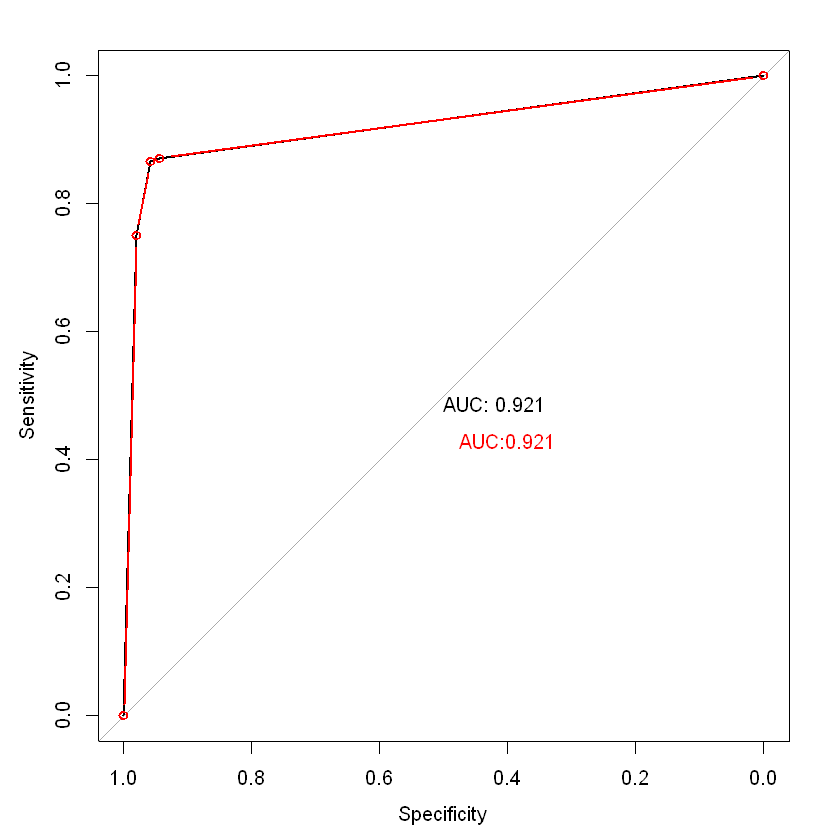

In [149]:
#Validation DataSet -Calculate Accuracy of training model predictions to validation data set and the AUC, the area under the ROC Curve
wine.predictions = get.wine.prediction(tree.sub.5,ds.partitions$data.validating)
wine.auc = wine.prediction.auc(ds.partitions$data.validating$Class,wine.predictions[,1])
paste0("AUC: ",wine.auc)
plot.wine.auc(ds.partitions$data.validating$Class,wine.predictions[,1])